# Filtros de Respuesta al Impulso Finita (FIR)
## 1. Respuesta al impulso del filtro ideal

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [2]:
# Definicion de funcion para graficar respuesta en frecuencia del filtro
def freqz_plot(b,a,sr):
    w, h = signal.freqz(b,a)
    h[h==0] = 1E-5
    
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [35]:
def fir(fc, N, sr):
    ft = 2*np.pi*fc/float(sr)
    M  = N + 1
    s  = np.ones(M)
    m  = np.arange(M) - M/2
    
    s[m!=0] = np.sin( ft*m[m!=0] )/( np.pi*m[m!=0] )
    s[m==0] = 2*ft
    
    sa       = -s.copy()
    sa[m==0] = 1+2*ft
    print m*ft
    return s,sa,m

In [36]:
sr        = 120
lp, hp, m = fir(20, 16, 120)


[-8.37758041 -7.33038286 -6.28318531 -5.23598776 -4.1887902  -3.14159265
 -2.0943951  -1.04719755  0.          1.04719755  2.0943951   3.14159265
  4.1887902   5.23598776  6.28318531  7.33038286  8.37758041]


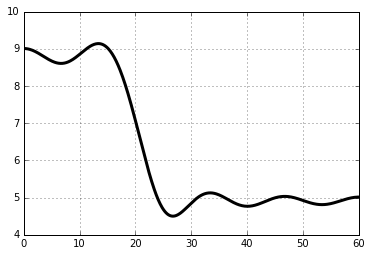

In [40]:
w, W, H, = freqz_plot(lp,[1.],sr)
plt.plot(w,H,'k',linewidth=3)

#w, W, H, = freqz_plot(hp,[1.],sr)
#plt.plot(w,H,'r',linewidth=3)

plt.grid(True)
plt.show()

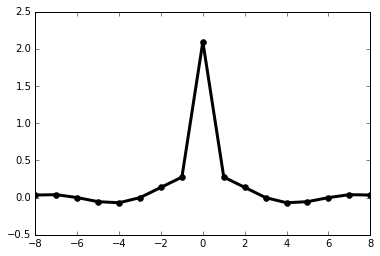

In [41]:
plt.plot( m,lp,'-ok',linewidth=3 )
#plt.plot( m,hp,'-or',linewidth=3 )
plt.show()

In [50]:
t       = np.ones( lp.shape[0] )
t[1::2] = -1
print t

[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.]


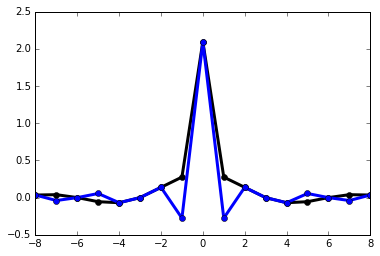

In [51]:
plt.plot( m,lp  ,'-ok',linewidth=3 )
plt.plot( m,lp*t,'-ob',linewidth=3 )
plt.show()

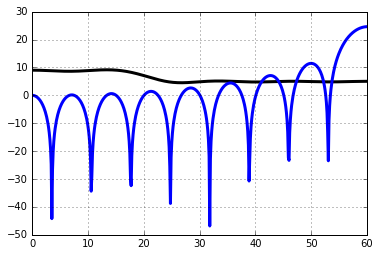

In [52]:
w, W, H, = freqz_plot(lp,[1.],sr)
plt.plot(w,H,'k',linewidth=3)

w, W, H, = freqz_plot(t,[1.],sr)
plt.plot(w,H,'b',linewidth=3)

plt.grid(True)
plt.show()

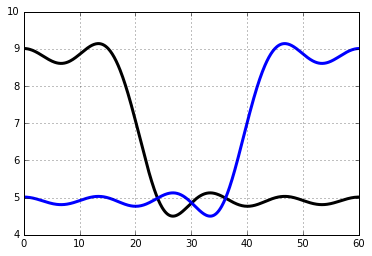

In [53]:
w, W, H, = freqz_plot(lp,[1.],sr)
plt.plot(w,H,'k',linewidth=3)

w, W, H, = freqz_plot(t*lp,[1.],sr)
plt.plot(w,H,'b',linewidth=3)

plt.grid(True)
plt.show()

In [29]:
sr = 150.
wc = np.array([0, 1.5, 3, 22.5, 30, 75])/sr
print wc
N  = 40
b  = signal.remez(N, wc, [0,1,0] )


[ 0.    0.01  0.02  0.15  0.2   0.5 ]


[-0.01675516 -0.0159174  -0.01507964 -0.01424189 -0.01340413 -0.01256637
 -0.01172861 -0.01089085 -0.0100531  -0.00921534 -0.00837758 -0.00753982
 -0.00670206 -0.00586431 -0.00502655 -0.00418879 -0.00335103 -0.00251327
 -0.00167552 -0.00083776  0.          0.00083776  0.00167552  0.00251327
  0.00335103  0.00418879  0.00502655  0.00586431  0.00670206  0.00753982
  0.00837758  0.00921534  0.0100531   0.01089085  0.01172861  0.01256637
  0.01340413  0.01424189  0.01507964  0.0159174   0.01675516]
[-0.12566371 -0.11938052 -0.11309734 -0.10681415 -0.10053096 -0.09424778
 -0.08796459 -0.08168141 -0.07539822 -0.06911504 -0.06283185 -0.05654867
 -0.05026548 -0.0439823  -0.03769911 -0.03141593 -0.02513274 -0.01884956
 -0.01256637 -0.00628319  0.          0.00628319  0.01256637  0.01884956
  0.02513274  0.03141593  0.03769911  0.0439823   0.05026548  0.05654867
  0.06283185  0.06911504  0.07539822  0.08168141  0.08796459  0.09424778
  0.10053096  0.10681415  0.11309734  0.11938052  0.12566371]


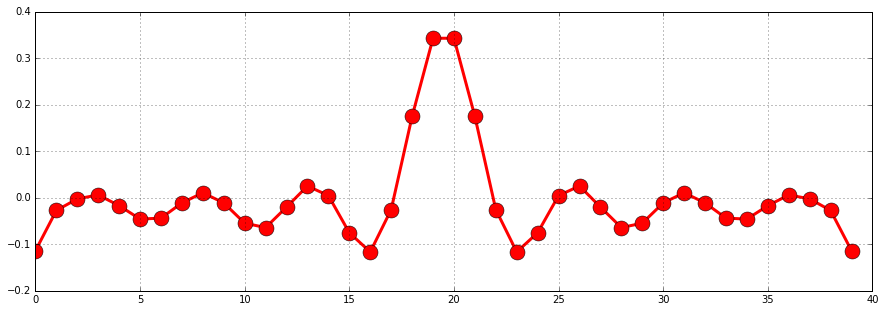

In [30]:
plt.figure(figsize=(15,5))
plt.plot(b,'-or',linewidth=3,markersize=15)

b0 = fir(wc[2], N, sr )
b1 = fir(wc[3], N, sr )

#plt.plot( b0[0]+b1[1],'-ob',linewidth=3,markersize=15 )
plt.grid(True)
plt.show()

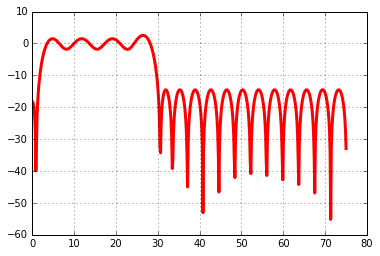

In [31]:
w, W, H, = freqz_plot(b,[1.],sr)
plt.plot(w,H,'r',linewidth=3)

#w, W, H, = freqz_plot(b0[0]+b1[1],[1.],sr)
#plt.plot(w,H,'b',linewidth=3)

plt.grid(True)
plt.show()

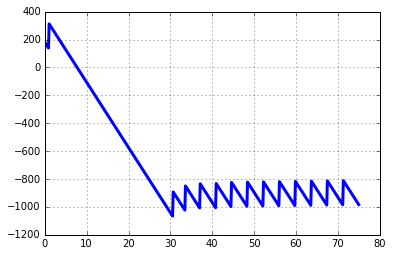

In [32]:
w, W, H, = freqz_plot(b,[1.],sr)
plt.plot(w,W,'b',linewidth=3)

plt.grid(True)
plt.show()